In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

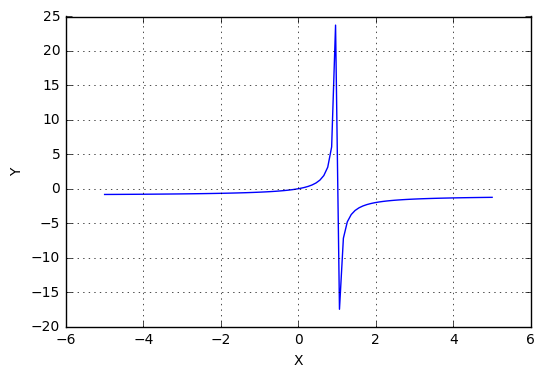

In [25]:
X = np.linspace(-5, 5, 100)
Y = X / (1 - X)

plt.plot(X, Y)
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

/home/maryszmary/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


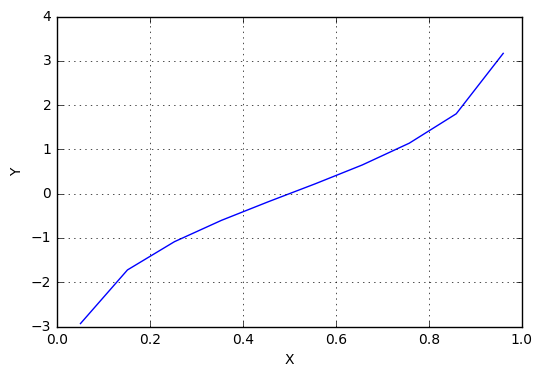

In [26]:
X = np.linspace(-5, 5, 100)
Y = np.log(X / (1 - X))

plt.plot(X, Y)
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [28]:
df = pd.read_csv("http://www.ats.ucla.edu/stat/data/binary.csv")

In [29]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


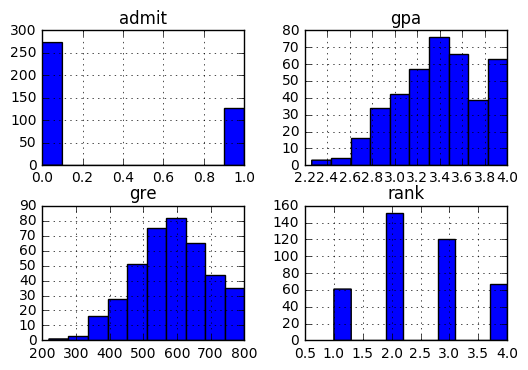

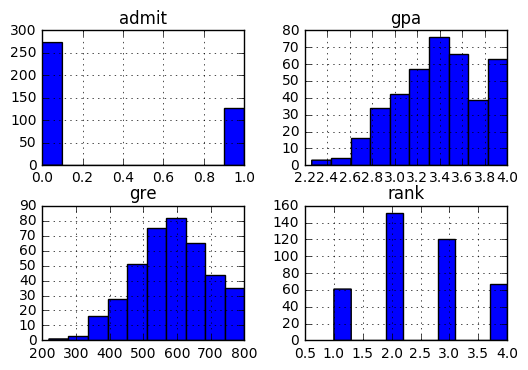

In [32]:
df.hist()
plt.show()

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
dummy_ranks = pd.get_dummies(df['rank'], prefix='prestige')
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])
data.head()

,admit,gre,gpa,prestige_2,prestige_3,prestige_4
0,0,380,3.61,0.0,1.0,0.0
1,1,660,3.67,0.0,1.0,0.0
2,1,800,4.00,0.0,0.0,0.0
3,1,640,3.19,0.0,0.0,1.0
4,0,520,2.93,0.0,0.0,1.0


(320, 5) (80, 5) (320,) (80,)


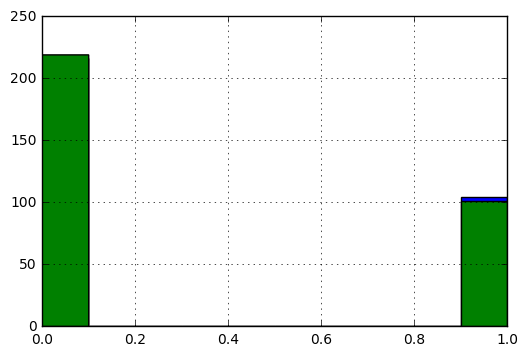

In [40]:
features = ['gre', 'gpa','prestige_2', 'prestige_3', 'prestige_4']
X_train, X_test, y_train, y_test = train_test_split(data[features], 
                                                    data['admit'], 
                                                    test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
y_train.hist()
plt.show()

In [43]:
clf = LogisticRegression(class_weight='balanced')
clf.fit(X_train, y_train)
clf.coef_

array([[ 0.00165365,  0.36451493, -0.59682124, -1.21098566, -1.4767302 ]])

In [44]:
clf.intercept_

array([-1.41898793])

In [45]:
clf.classes_

array([0, 1], dtype=int64)

In [47]:
print(classification_report(y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

          0       0.74      0.59      0.66        54
          1       0.41      0.58      0.48        26

avg / total       0.63      0.59      0.60        80



In [48]:
print(confusion_matrix(y_test, clf.predict(X_test)))

[[32 22]
 [11 15]]
